In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading in data
launchfile = "launchlog.txt"

ldb = pd.read_fwf(launchfile) ## Launch database = ldb
ldb.drop(columns=["Unnamed: 10", "Unnamed: 11", "Unnamed: 12"], inplace=True) ## Remove empty columns with launchpad info

ldb.columns = ["Code", "Date_Full", "Time", "COSPAR",
                "Payload1", "Payload2", "SATCAT", "LV_Type", "LV_Serial",
                "Site", "Succes", "Reference"]

# split date into Year column and Date column
ldb["Year"] = ldb["Date_Full"].str.slice(start=0, stop=4)
ldb["Date"] = ldb["Date_Full"].str.slice(start=4, stop=None)

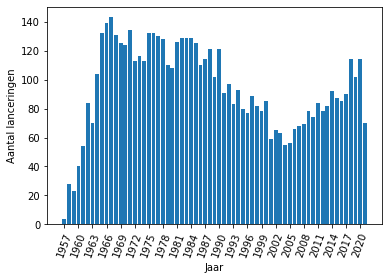

In [3]:
# Plotting of launches since first launch in 1957
plotdata = pd.DataFrame(ldb["Year"].value_counts(sort=False))
plotdata.columns = ["Aantal"]
# print(plotdata)

plt.bar(plotdata.index[1:], plotdata.Aantal[1:])
plt.ylabel("Aantal lanceringen")
plt.xlabel("Jaar")

plt.xticks(range(0, (2021-1957), 3), rotation=70)
plt.show()

In [13]:
ldb[ldb['Succes']=="S"]

,Code,Date_Full,Time,COSPAR,Payload1,Payload2,SATCAT,LV_Type,LV_Serial,Site,Succes,Reference,Year,Date
1,1957 ALP,1957 Oct 4,1928:34,1957 ALP 2,1-y ISZ,PS-1,S00002,Sputnik 8K71PS,M1-PS,NIIP-5 LC1,S,Energiya,1957,Oct 4
2,1957-U01,1957 Oct 17,0505,1957-U01,USAF 88 Charge A,Poulter Pellet,A08258,Aerobee,USAF 88,HADC A,S,EngSci1.58,1957,Oct 17
3,1957 BET,1957 Nov 3,0230:42,1957 BET 1,2-y ISZ,PS-2,S00003,Sputnik 8K71PS,M1-2PS,NIIP-5 LC1,S,Grahn-WWW,1957,Nov 3
5,1958 ALP,1958 Feb 1,0347:56,1958 ALP,Explorer I,Explorer 1,S00004,Jupiter C,RS-29 UE,CC LC26A,S,JunoFam,1958,Feb 1
8,1958 BET,1958 Mar 17,1215:41,1958 BET 2,Vanguard I,Vanguard Test Satellite,S00005,Vanguard,TV-4,CC LC18A,S,SP-4202,1958,Mar 17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14710,2021-062,2021 Jul 4,2328,2021-062A,Feng Yun 3-05,FY-3E,S49008,Chang Zheng 4C,Y43,JQ,S,nasaspaceflight.com,2021,Jul 4
14711,2021-063,2021 Jul 6,1553,2021-063A,Tian Lian 1-05,tianlian yihao 05 xing,S49011,Chang Zheng 3C,Y18,XSC LC2,S,nasaspaceflight.com,2021,Jul 6
14712,2021-064,2021 Jul 9,1159,2021-064A,Zhongzi 02 zu 01 xing,Zhongzi 02-01,S49018,Chang Zheng 6,Y6,TYSC LC16,S,nasaspaceflight.com,2021,Jul 9
14717,2021-065,2021 Jul 18,0019,2021-065A,Yaogan 30 hao 10 zu 01,Chuangxin-5 28 xing,S49026,Chang Zheng 2C,Y49,XSC LC3,S,nasaspaceflight.com,2021,Jul 18


In [5]:
# Reading in launch vehicle data
vehicfile = "launchvehicles.txt"
vdb = pd.read_fwf(vehicfile, skiprows=65) ## vehicle database  = vdb
vhead = pd.read_fwf(vehicfile, nrows=64)

In [6]:
# Reading in column names
colname = "#TEXT/DTF-FIXED"
colnames = []

for row in vhead[colname]:
    if row[0:5] == "TTYPE":
        newname = row[11:-1]
        colnames.append(newname)
        print(newname)


print("Total: " + str(len(colnames)))

LV_Name 
LV_Family
LV_Manufacturer
LV_Variant
LV_Alias
LV_Min_Stage
LV_Max_Stage
Length
LFlag
Diameter
DFlag
Launch_Mass
MFlag
LEO_Capacity
GTO_Capacity
TO_Thrust
Class
Apogee
Range 
Total: 19


In [7]:
# Create temporary numbered column names for vehicles
tempcolnames = []
for i in range(len(vdb.columns)):
    tempcolnames.append("Col" + str(i))

vdb.columns = tempcolnames

In [8]:
## Trying to split a column into its component parts, was not read in correctly
vdb[["Col17", "Col18"]] = vdb["Col8"].str.split(expand=True)

vdb

,Col0,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18
0,N-1 11A52,NaN,N-1,OKB1,-,NaN,1,3,105.3 14.00,2788.0,70000.0,NaN,0.0,NaN,45300,O,200,105.3,14.00
1,Saturn V,NaN,SaturnV,MSFC,-,NaN,1,4,110.6 10.06,2913.0,118000.0,NaN,0.0,NaN,34030,O,400000,110.6,10.06
2,Saturn V,NaN,SaturnV,MSFC,2,NaN,1,3,104.8 10.06,2822.0,75000.0,NaN,0.0,NaN,34030,O,500,104.8,10.06
3,Starship V1.0,NaN,Starship,SPX,-,NaN,1,1,50.0 9.00,1470.0,0.0,NaN,0.0,NaN,12000,R,20,50.0,9.00
4,Starship V1.0/Super,Heavy,Starship,SPX,-,NaN,1,2,118.0 9.00,5020.0,150000.0,NaN,0.0,NaN,72500,O,200,118.0,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,X-7B,NaN,X-7,LVN,-,NaN,0,1,2.1 0.61,3.6,0.0,NaN,0.0,-,NaN,C,30,2.1,0.61
1628,X-7A-3,NaN,X-7,LVN,-,NaN,0,1,2.1 0.61,3.6,0.0,NaN,0.0,-,NaN,C,30,2.1,0.61
1629,GLCM,NaN,GLCM,GDA,-,NaN,1,1,6.4 0.53,1.8,0.0,NaN,0.0,-,NaN,C,20,6.4,0.53
1630,BLDT,NaN,BLDT,JPL,-,NaN,1,1,0.0 0.00,0.0,0.0,NaN,0.0,-,NaN,C,10,0.0,0.00
